In [1]:
###: Importing H2O Library

In [2]:
import h2o

In [3]:
###: Initializing h2O

In [4]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,2 hours 28 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,1 month
H2O cluster name:,H2O_from_python_avkashchauhan_d7ekmq
H2O cluster total nodes:,1
H2O cluster free memory:,3.260 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [5]:
### : Getting H2O Cluster status

In [6]:
h2o.cluster().show_status()

H2O cluster uptime:,2 hours 28 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,1 month
H2O cluster name:,H2O_from_python_avkashchauhan_d7ekmq
H2O cluster total nodes:,1
H2O cluster free memory:,3.260 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [7]:
###: Importing Dataset

In [8]:
df = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/titanic_list.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
###: Understanding Dataset

In [10]:
df.describe()

Rows:1309
Cols:14




,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
type,int,int,string,enum,real,int,int,int,real,enum,enum,int,int,enum
mins,1.0,0.0,NaN,,0.1667,0.0,0.0,680.0,0.0,,,1.0,1.0,
mean,2.294881589,0.381970970206,NaN,,29.8811345124,0.498854087089,0.385026737968,249039.136886,33.2954792813,,,9.40452261307,160.809917355,
maxs,3.0,1.0,NaN,,80.0,8.0,9.0,3101298.0,512.3292,,,16.0,328.0,
sigma,0.83783601897,0.486055170866,NaN,,14.4134996999,1.0416583906,0.86556027535,442685.317677,51.7586682392,,,4.3574169836,97.696921996,
zeros,0,809,0,,0,891,1002,0,17,,,0,0,
missing,0,0,0,0,263,0,0,352,1,1014,2,911,1188,564
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160.0,211.3375,B5,S,2.0,nan,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781.0,151.55,C22 C26,S,11.0,nan,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781.0,151.55,C22 C26,S,nan,nan,"Montreal, PQ / Chesterville, ON"


In [11]:
###: Understanding Dataset with pylab library

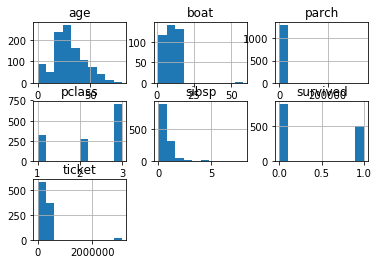

In [12]:
import pylab as pl
pl.figure(figsize=(20,10))
df.as_data_frame().hist()
pl.show()

In [13]:
###: Getting a list of columns in our dataset

In [14]:
df.col_names

[u'pclass',
 u'survived',
 u'name',
 u'sex',
 u'age',
 u'sibsp',
 u'parch',
 u'ticket',
 u'fare',
 u'cabin',
 u'embarked',
 u'boat',
 u'body',
 u'home.dest']

In [15]:
###: Setting Response column

In [16]:
response = "survived"

In [17]:
###: Setting Response column to factor so we can get unique values in it

In [18]:
df['survived'].asfactor().levels()

[['0', '1']]

In [19]:
###: Setting Response column to factor so we can build classification model

In [20]:
df[response] = df[response].asfactor()

In [21]:
###: Verifying Response column as factor 

In [22]:
df[response].describe()

Rows:1309
Cols:1




,survived
type,enum
mins,
mean,
maxs,
sigma,
zeros,
missing,0
0,1
1,1
2,0


In [23]:
###: spliting the dataset into train, test and validation  

In [24]:
train, valid, test = df.split_frame(ratios=[0.8,0.1])
print(train.shape)
print(valid.shape)
print(test.shape)

(1039, 14)
(131, 14)
(139, 14)


In [25]:
###: Setting all columns/features into a local variable

In [26]:
features = df.col_names

In [27]:
###: Settings all features for model building

In [28]:
features.remove(response)
print(features)

[u'pclass', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body', u'home.dest']


In [29]:
###: Ignoring list of features which are not required for model building

In [30]:
ignore_list = ['name', 'ticket', 'home.dest']
for x in ignore_list:
    features.remove(x)
print(features)    

[u'pclass', u'sex', u'age', u'sibsp', u'parch', u'fare', u'cabin', u'embarked', u'boat', u'body']


In [31]:
###: Importing H2O AutoML Library

In [32]:
from h2o.automl import H2OAutoML

In [33]:
###: Setting H2O AutoML model configuration (default)

In [34]:
titanic_automl = H2OAutoML(max_models= 100,
                           seed=1234,
                           max_runtime_secs=60, 
                           project_name= "Titanic AutoML")

In [35]:
###: Training H2O AutoML 

In [36]:
titanic_automl.train(x = features, y = response,training_frame=train,validation_frame=valid)

AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [37]:
###: Getting the list of models created by AutoML in given time

In [38]:
titanic_automl.leaderboard

model_id,auc,logloss
GBM_grid_1_AutoML_20171120_211114_model_3,0.982655,0.170869
GBM_grid_0_AutoML_20171120_211114_model_3,0.977376,0.182504
GBM_grid_1_AutoML_20171120_211114_model_10,0.975113,0.173626
GBM_grid_0_AutoML_20171120_211114_model_2,0.973605,0.193965
DRF_0_AutoML_20171120_211114,0.972851,0.231987
GBM_grid_0_AutoML_20171120_211114_model_1,0.971342,0.200664
GBM_grid_1_AutoML_20171120_211114_model_7,0.96908,0.19873
StackedEnsemble_0_AutoML_20171120_211114,0.967572,0.199682
GBM_grid_0_AutoML_20171120_211114_model_0,0.966063,0.196175
GBM_grid_1_AutoML_20171120_211114_model_6,0.959276,0.248401


In [39]:
###: Getting the best model or Leader model from the AutoML leader board

In [40]:
titanic_leader = titanic_automl.leader

In [41]:
###: Understanding best Model (Leader Model) overall performance based on training data

In [42]:
titanic_leader.model_performance(valid=True)


ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.059700459265
RMSE: 0.244336774279
LogLoss: 0.228838638009
Mean Per-Class Error: 0.0625
AUC: 0.96568627451
Gini: 0.93137254902
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.997681586255: 


,0,1,Error,Rate
0,34.0,0.0,0.0,(0.0/34.0)
1,3.0,21.0,0.125,(3.0/24.0)
Total,37.0,21.0,0.0517,(3.0/58.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.9976816,0.9333333,20.0
max f2,0.1302186,0.9274194,25.0
max f0point5,0.9976816,0.9722222,20.0
max accuracy,0.9976816,0.9482759,20.0
max precision,0.9999887,1.0,0.0
max recall,0.0057502,1.0,42.0
max specificity,0.9999887,1.0,0.0
max absolute_mcc,0.9976816,0.8966906,20.0
max min_per_class_accuracy,0.4319565,0.9117647,22.0
max mean_per_class_accuracy,0.9976816,0.9375,20.0


Gains/Lift Table: Avg response rate: 41.38 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0172414,0.9999874,2.4166667,2.4166667,1.0,1.0,0.0416667,0.0416667,141.6666667,141.6666667
,2,0.0344828,0.9999844,2.4166667,2.4166667,1.0,1.0,0.0416667,0.0833333,141.6666667,141.6666667
,3,0.0344828,0.9999765,0.0,2.4166667,0.0,1.0,0.0,0.0833333,-100.0,141.6666667
,4,0.0517241,0.9999684,2.4166667,2.4166667,1.0,1.0,0.0416667,0.125,141.6666667,141.6666667
,5,0.0517241,0.9999604,0.0,2.4166667,0.0,1.0,0.0,0.125,-100.0,141.6666667
,6,0.1034483,0.9999349,2.4166667,2.4166667,1.0,1.0,0.125,0.25,141.6666667,141.6666667
,7,0.1551724,0.9999212,2.4166667,2.4166667,1.0,1.0,0.125,0.375,141.6666667,141.6666667
,8,0.2068966,0.9998583,2.4166667,2.4166667,1.0,1.0,0.125,0.5,141.6666667,141.6666667
,9,0.3103448,0.9997729,2.4166667,2.4166667,1.0,1.0,0.25,0.75,141.6666667,141.6666667
,10,0.4310345,0.4319565,1.3809524,2.1266667,0.5714286,0.88,0.1666667,0.9166667,38.0952381,112.6666667


In [ ]:
titanic_leader.model_performance(valid=True).auc()

In [ ]:
###: Plotting AutoML Leader Model for its AUC metric 

In [ ]:
titanic_leader.plot(metric='auc')

In [ ]:
###: Generating Variable Importance Plot for the Leader Model

In [ ]:
titanic_leader.varimp_plot()

In [ ]:
###:  H2O AutoMLmodel varialbe Scoring History

In [ ]:
titanic_leader.score_history()

In [ ]:
### PERFORMING PREDICTIONS USING a TEST DATA SET with Auto ML Leader model

In [ ]:
titanic_leader.predict(test)

In [ ]:
###: Getting AUC metrics from the test data using AutoML Leader Model

In [ ]:
titanic_leader.model_performance(test_data=test).auc()